In [4]:
!pwd

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd "/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car


In [7]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 2.6MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [4]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [5]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

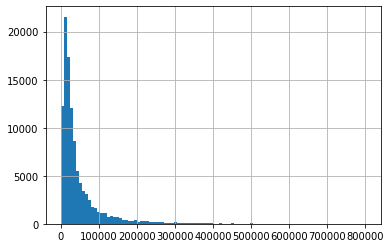

In [7]:
df['price_value'].hist(bins=100)

In [9]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

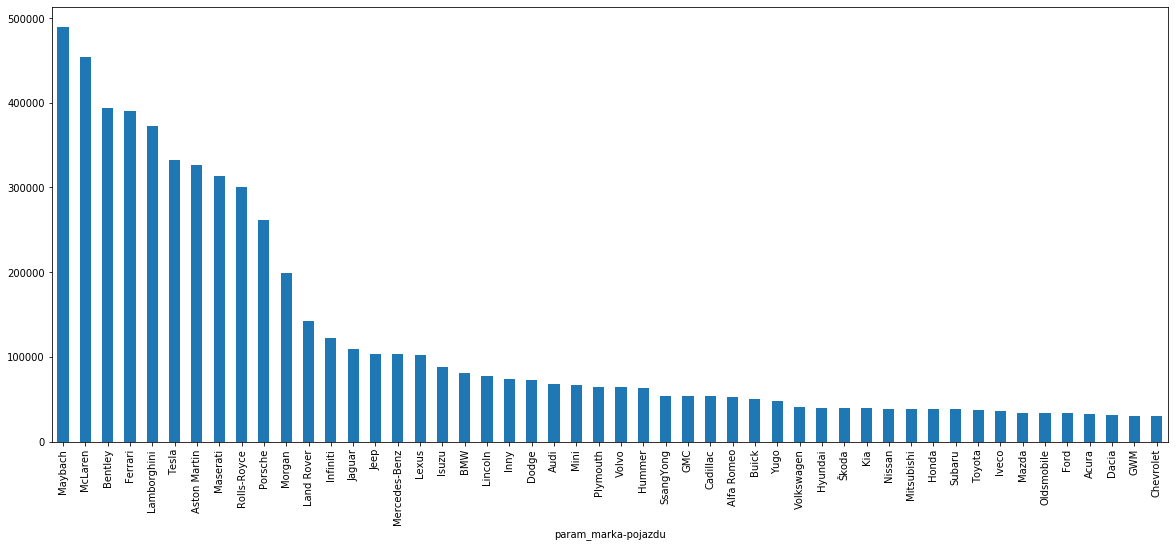

In [19]:

(
  df
    .groupby('param_marka-pojazdu')['price_value']
    .agg(np.mean)
    .sort_values(ascending=False)
    .head(50)
    
).plot(kind='bar',figsize=(20,8))

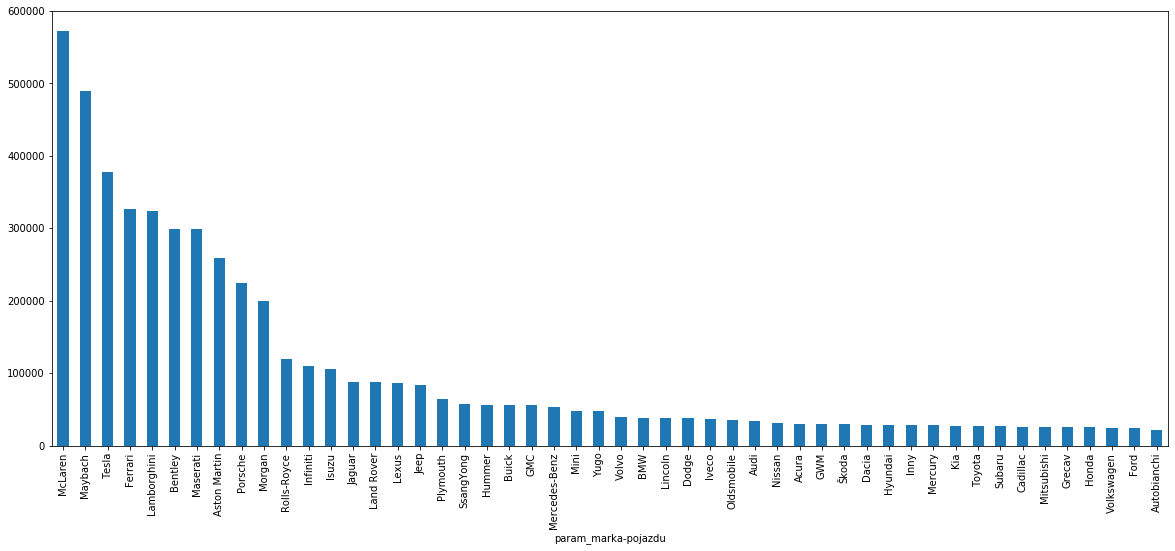

In [20]:
(
  df
    .groupby('param_marka-pojazdu')['price_value']
    .agg(np.median)
    .sort_values(ascending=False)
    .head(50)
    
).plot(kind='bar',figsize=(20,8))

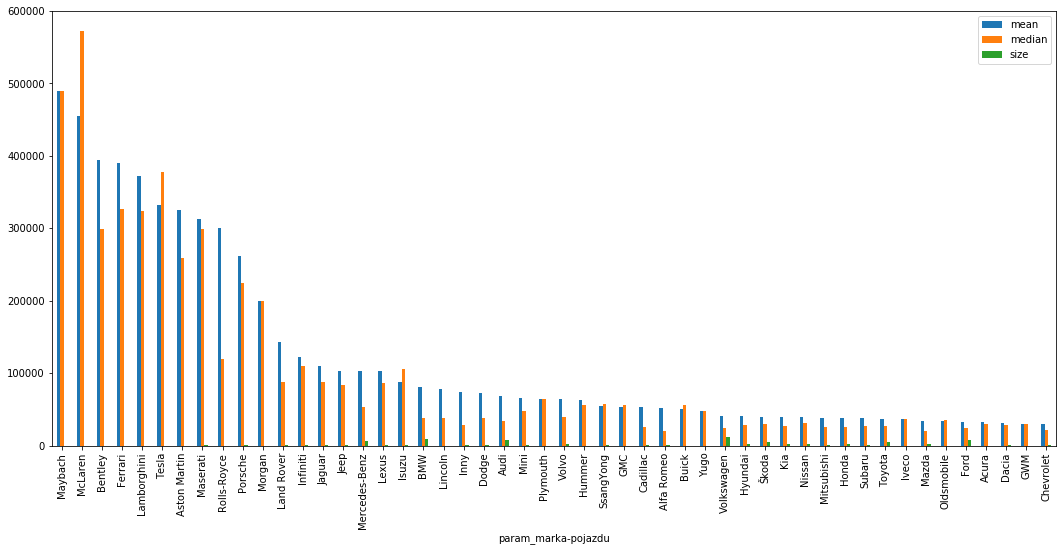

In [25]:
(
  df
    .groupby('param_marka-pojazdu')['price_value']
    .agg([np.mean, np.median, np.size])
    .sort_values(by='mean' , ascending=False)
    .head(50)
    
).plot(kind='bar',figsize=(18,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0978b3ec50>,
      dtype=object)

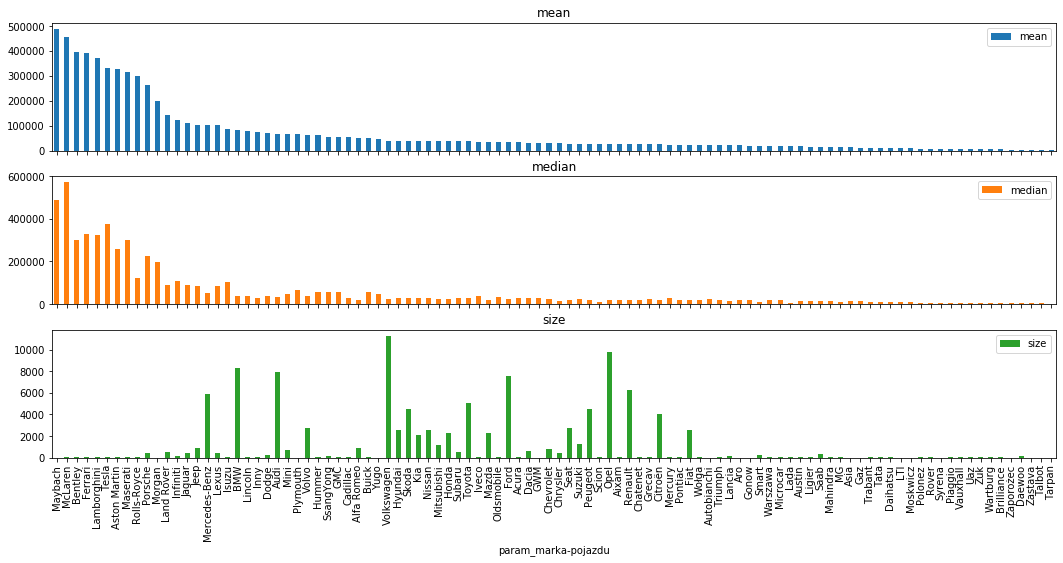

In [29]:
(
  df
    .groupby('param_marka-pojazdu')['price_value']
    .agg([np.mean, np.median, np.size])
    .sort_values(by='mean' , ascending=False)
    #.head(50)
    
).plot(kind='bar',figsize=(18,8), subplots = True)

In [0]:
def groupAndBarPlot (groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], sort='mean', top=50, subplots=True):
  return(
    df
      .groupby(groupby)[feat_agg]
      .agg(agg_funcs)
      .sort_values(by=sort , ascending=False)
      .head(top)
      
  ).plot(kind='bar',figsize=(18,8), subplots = subplots)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f097810f358>,
      dtype=object)

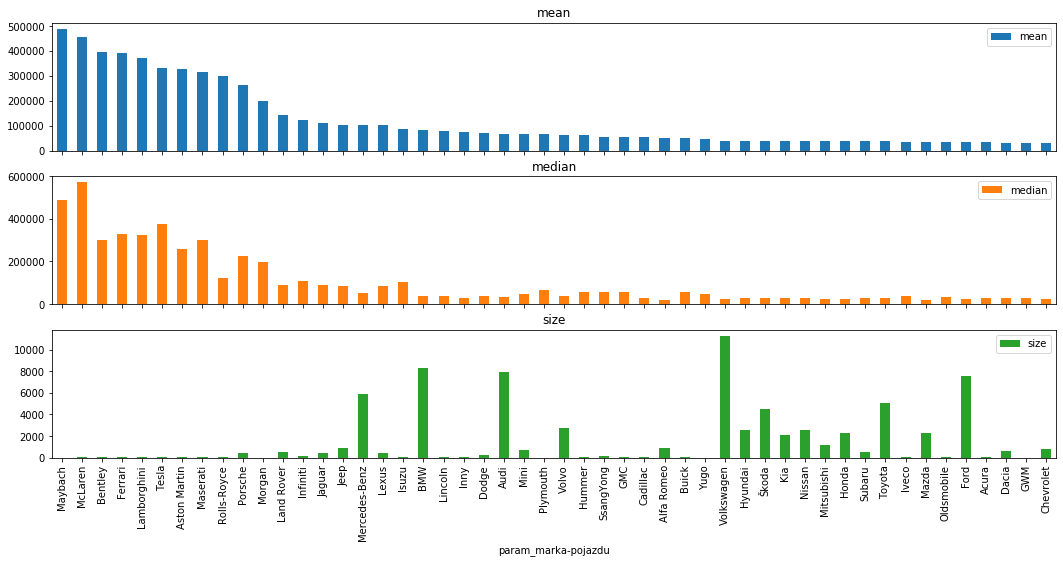

In [37]:
groupAndBarPlot('param_marka-pojazdu')

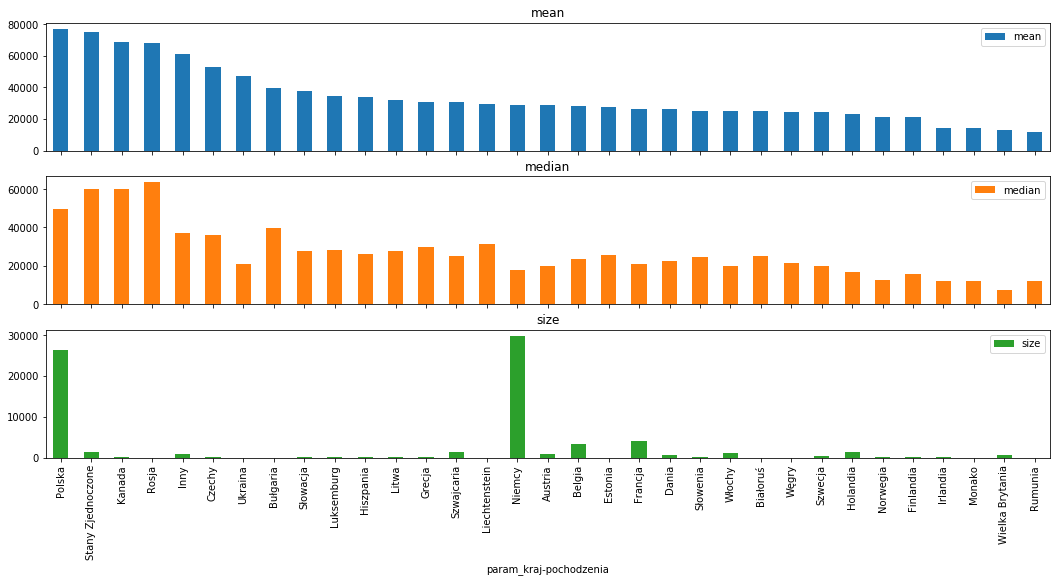

In [40]:
groupAndBarPlot('param_kraj-pochodzenia', top=100);

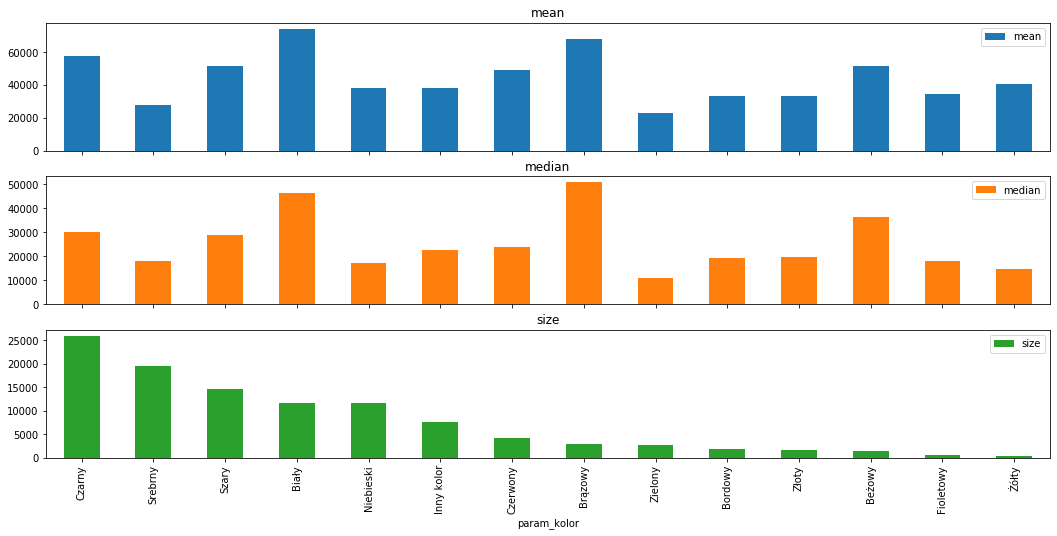

In [43]:
groupAndBarPlot('param_kolor', sort='size');